# WeatherPy
---
##  Ryan begins now


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the cities list using the citipy library

In [3]:
# list for holding Lat/ longitude combos
lat_lngs = []

# list for cities
cities = []

# ranges for lat and long combos
lat_range = (-90, 90)
long_range = (-180, 180)

#create a set of random coordinates
lats = np.random.uniform(lat_range[0],lat_range[1], size=2000).tolist()
longs = np.random.uniform(long_range[0],long_range[1], size =2000).tolist()

# zip randomly generated latitudes and longitudes to make a list of coordinates
lat_lngs = zip(lats, longs)

# locating nearest city for all generated coordinates
for lat_long in lat_lngs:
    city = citipy.nearest_city(lat_long[0],lat_long[1]).city_name

    # if city is unique, add to list of cities
    if city not in cities:
        cities.append(city)

# print city count to validate city count is above the minimum requirement
print(f"Number of cities in list: {len(cities)}")
print(cities[:5])

Number of cities in list: 740
['huinan', 'tuktoyaktuk', 'albany', 'atuona', 'narsaq']


### Part 1: create plots to visualize the relationship between weather variables and Latitude

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key

# Define an empty list for weather data in each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities to get weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&q={city.replace(' ', '+')}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        #send get request to the API 
        response = requests.get(city_url)
        
        #if response is successful then retrieve weather data
        if response.status_code ==200:
            city_weather=response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = (city_weather['main']['temp_max']) - 273.15 
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | huinan
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | narsaq
Processing Record 6 of Set 1 | kenai
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | ustyuzhna
Processing Record 9 of Set 1 | kasongo
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | bidar
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | mnogovershinnyy
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | attawapiskat
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | okhotsk
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | tagusao
Processing Record 23 of Set 1 | havelock
Proc

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          740
Lat           740
Lng           740
Max Temp      740
Humidity      740
Cloudiness    740
Wind Speed    740
Country       740
Date          740
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,huinan,42.6225,126.2614,19.08,48,9,4.49,CN,1685752646
1,tuktoyaktuk,69.4541,-133.0374,10.00,62,75,6.17,CA,1685752647
2,albany,42.6001,-73.9662,20.53,96,81,0.76,US,1685752381
3,atuona,-9.8000,-139.0333,26.80,72,1,4.44,PF,1685752650
4,narsaq,60.9167,-46.0500,7.12,99,100,1.43,GL,1685752651


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huinan,42.6225,126.2614,19.08,48,9,4.49,CN,1685752646
1,tuktoyaktuk,69.4541,-133.0374,10.00,62,75,6.17,CA,1685752647
2,albany,42.6001,-73.9662,20.53,96,81,0.76,US,1685752381
3,atuona,-9.8000,-139.0333,26.80,72,1,4.44,PF,1685752650
4,narsaq,60.9167,-46.0500,7.12,99,100,1.43,GL,1685752651


### create scatter plots requested
 
 ##### Latitude v. Temperature

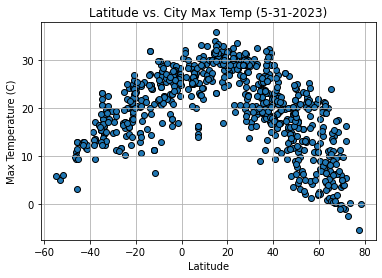

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black' )

# Incorporate the other graph properties
plt.title("Latitude vs. City Max Temp (5-31-2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Latitude_v_max_temp.png")

# Show plot
plt.show()

#### Latitude v humidity

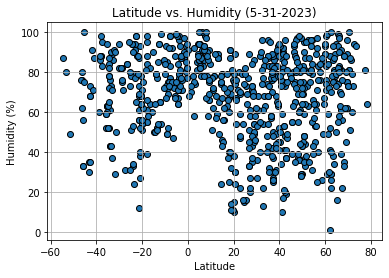

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black' )

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (5-31-2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/latitude_v_humidity.png")

# Show plot
plt.show()

#### Latitude v cloudiness

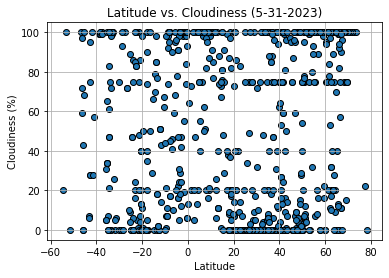

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black' )

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (5-31-2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_v_cloudiness.png")

# Show plot
plt.show()

#### Latitude v wind speed

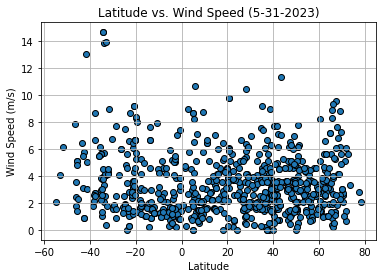

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black' )
# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (5-31-2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/latitude_v_wind_speed.png")

# Show plot
plt.show()

### Requirement 2: Compute linear regress for each relationship

In [13]:
# Define a function to separate data by hemisphere
def separate_hemisphere(city_data_df):
        # Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
        northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]
        # Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
        southern_hemi_df = city_data_df[city_data_df['Lat'] <0]
        return northern_hemi_df, southern_hemi_df


northern_hemi_df, southern_hemi_df = separate_hemisphere(city_data_df)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,huinan,42.6225,126.2614,19.08,48,9,4.49,CN,1685752646
1,tuktoyaktuk,69.4541,-133.0374,10.00,62,75,6.17,CA,1685752647
2,albany,42.6001,-73.9662,20.53,96,81,0.76,US,1685752381
4,narsaq,60.9167,-46.0500,7.12,99,100,1.43,GL,1685752651
5,kenai,60.5544,-151.2583,12.79,76,75,8.23,US,1685752652


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,atuona,-9.8000,-139.0333,26.80,72,1,4.44,PF,1685752650
6,rikitea,-23.1203,-134.9692,24.23,78,16,6.62,PF,1685752653
8,kasongo,-4.4500,26.6667,21.54,67,22,0.88,CD,1685752655
13,punta arenas,-53.1500,-70.9167,5.06,80,100,4.11,CL,1685752660
14,ancud,-41.8697,-73.8203,11.61,91,100,13.09,CL,1685752660


### Temp v Latitude linear regression

Correlation coefficient (r-value):', -0.766
Slope: -0.349
Intercept: 33.091
r-Squared: 0.587


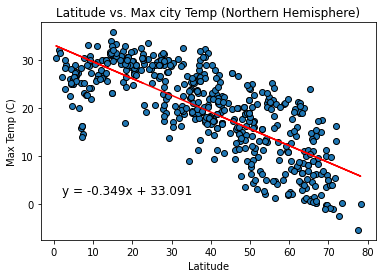

In [37]:
#northern hemisphere
#calculate correlation coefficient
correlation_coefficient_N_T, p_value_N_T = st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
print(f"Correlation coefficient (r-value):', {round(correlation_coefficient_N_T,3)}")

#perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
print(f"Slope: {round(slope, 3)}")
print(f"Intercept: {round(intercept, 3)}")
print(f"r-Squared: {round((rvalue) **2, 3)}")
equation_txt = f"y = {round(slope,3)}x + {round(intercept,3)}"

#generate scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], edgecolors = 'black')

#add regression line
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')


#format
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Latitude vs. Max city Temp (Northern Hemisphere)')
plt.text(2,2, equation_txt, fontsize = 12)


plt.show()

Correlation coefficient (r-value): 0.726
Slope: 0.317
Intercept: 26.271
r-Squared: 0.526


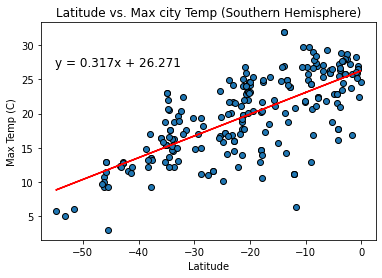

In [36]:
#Southern hemisphere
#calculate correlation coefficient
correlation_coefficient_S_T, p_value_S_T = st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
print(f"Correlation coefficient (r-value): {round(correlation_coefficient_S_T,3)}")

#perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
print(f"Slope: {round(slope, 3)}")
print(f"Intercept: {round(intercept, 3)}")
print(f"r-Squared: {round((rvalue) **2, 3)}")
equation_txt = f"y = {round(slope,3)}x + {round(intercept,3)}"

#generate scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], edgecolors = 'black')

#add regression line
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')


#format
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')
plt.title('Latitude vs. Max city Temp (Southern Hemisphere)')
plt.text(-55,27, equation_txt, fontsize = 12)


plt.show()

<p>For the northern hemisphere, a negative slope suggests that as you move closer to the equator, the max temperatures increase; and for the southern hemisphere a positive slope indicates the same. Additionally, r-values of -0.76 & 0.72 (for northern and southern hemispheres respectively) indicate a fairly strong linear relationship for both hemispheres.</p>


### Humidity v. Latitude linear regression

Correlation coefficient (r-value):', -0.02
Slope: -0.023
Intercept: 67.239
r-Squared: 0.0


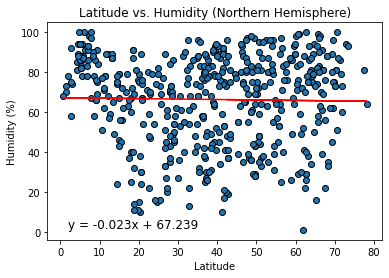

In [38]:
#northern hemisphere
#calculate correlation coefficient
correlation_coefficient_N_H, p_value_N_H = st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
print(f"Correlation coefficient (r-value):', {round(correlation_coefficient_N_H,3)}")

#perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
print(f"Slope: {round(slope, 3)}")
print(f"Intercept: {round(intercept, 3)}")
print(f"r-Squared: {round((rvalue) **2, 3)}")
equation_txt = f"y = {round(slope,3)}x + {round(intercept,3)}"

#generate scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], edgecolors = 'black')

#add regression line
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')


#format
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (Northern Hemisphere)')
plt.text(2,2, equation_txt, fontsize = 12)


plt.show()

Correlation coefficient (r-value): 0.219
Slope: 0.293
Intercept: 78.063
r-Squared: 0.048


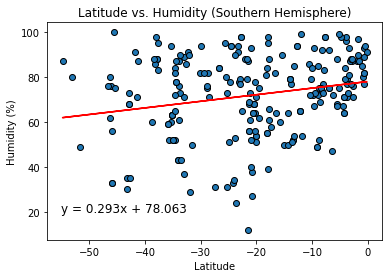

In [41]:
#Southern hemisphere
#calculate correlation coefficient
correlation_coefficient_S_H, p_value_S_H = st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
print(f"Correlation coefficient (r-value): {round(correlation_coefficient_S_H,3)}")

#perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
print(f"Slope: {round(slope, 3)}")
print(f"Intercept: {round(intercept, 3)}")
print(f"r-Squared: {round((rvalue) **2, 3)}")
equation_txt = f"y = {round(slope,3)}x + {round(intercept,3)}"

#generate scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], edgecolors = 'black')

#add regression line
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')


#format
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity (Southern Hemisphere)')
plt.text(-55,20, equation_txt, fontsize = 12)


plt.show()

<p>Both hemispheres have minimal slope (no real trend to observe) across latitudes as well as correlation coefficients < 0.25 which indicates a fairly weak linear relationship between latitude and humidity.</p>

### Cloudiness v Latitude linear regression

Correlation coefficient (r-value):', 0.102
Slope: 0.223
Intercept: 42.449
r-Squared: 0.01


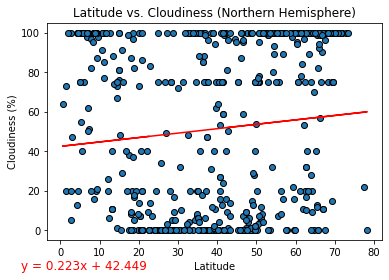

In [46]:
#northern hemisphere
#calculate correlation coefficient
correlation_coefficient_N_C, p_value_N_C = st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
print(f"Correlation coefficient (r-value):', {round(correlation_coefficient_N_C,3)}")

#perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
print(f"Slope: {round(slope, 3)}")
print(f"Intercept: {round(intercept, 3)}")
print(f"r-Squared: {round((rvalue) **2, 3)}")
equation_txt = f"y = {round(slope,3)}x + {round(intercept,3)}"

#generate scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], edgecolors = 'black')

#add regression line
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')


#format
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (Northern Hemisphere)')
plt.text(-10,-20, equation_txt, fontsize = 12, color = 'red')


plt.show()

Correlation coefficient (r-value): -0.0
Slope: -0.001
Intercept: 49.005
r-Squared: 0.0


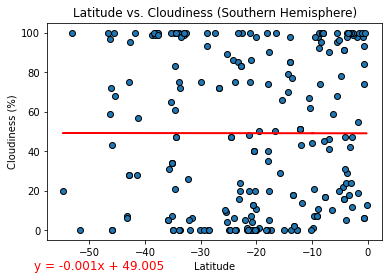

In [51]:
#Southern hemisphere
#calculate correlation coefficient
correlation_coefficient_S_C, p_value_S_C = st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
print(f"Correlation coefficient (r-value): {round(correlation_coefficient_S_C,3)}")

#perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
print(f"Slope: {round(slope, 3)}")
print(f"Intercept: {round(intercept, 3)}")
print(f"r-Squared: {round((rvalue) **2, 3)}")
equation_txt = f"y = {round(slope,3)}x + {round(intercept,3)}"

#generate scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], edgecolors = 'black')

#add regression line
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')


#format
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness (Southern Hemisphere)')
plt.text(-60,-20, equation_txt, fontsize = 12, color = 'red')


plt.show()

<p>Similar to humidity, there is not a strong slope to observe a trend between latitude and cloudiess, for both the northern and southern hemispheres. Additionally, the r-value is extremely close to 0 for both plots which confirms there is almost no linear relationship between latitude and cloudiness.</p>

### Wind speed v Latitude linear regression

Correlation coefficient (r-value):', 0.028
Slope: 0.003
Intercept: 3.209
r-Squared: 0.001


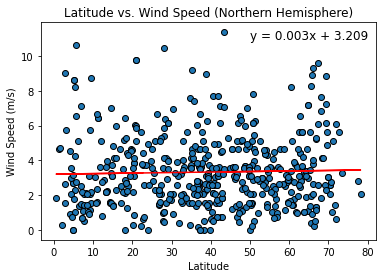

In [54]:
#northern hemisphere
#calculate correlation coefficient
correlation_coefficient_N_Ws, p_value_N_Ws = st.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
print(f"Correlation coefficient (r-value):', {round(correlation_coefficient_N_Ws,3)}")

#perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
print(f"Slope: {round(slope, 3)}")
print(f"Intercept: {round(intercept, 3)}")
print(f"r-Squared: {round((rvalue) **2, 3)}")
equation_txt = f"y = {round(slope,3)}x + {round(intercept,3)}"

#generate scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], edgecolors = 'black')

#add regression line
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')


#format
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs. Wind Speed (Northern Hemisphere)')
plt.text(50,11, equation_txt, fontsize = 12)


plt.show()

Correlation coefficient (r-value): -0.283
Slope: -0.056
Intercept: 2.331
r-Squared: 0.08


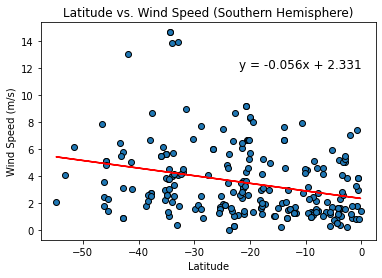

In [58]:
#Southern hemisphere
#calculate correlation coefficient
correlation_coefficient_S_Ws, p_value_S_Ws = st.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
print(f"Correlation coefficient (r-value): {round(correlation_coefficient_S_Ws,3)}")

#perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
print(f"Slope: {round(slope, 3)}")
print(f"Intercept: {round(intercept, 3)}")
print(f"r-Squared: {round((rvalue) **2, 3)}")
equation_txt = f"y = {round(slope,3)}x + {round(intercept,3)}"

#generate scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], edgecolors = 'black')

#add regression line
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')


#format
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs. Wind Speed (Southern Hemisphere)')
plt.text(-22, 12, equation_txt, fontsize = 12)


plt.show()

<p>For Wind speed, much like cloudiness and humidity, there is not much of a linear relationship with latitude (for both northern and southern hemispheres). In the northern hemisphere the correlation coefficient is 0.028 and in the southern hemisphere it is -0.28. </p>